# Import libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

# Import dataset

In [31]:
dataset = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

# Data preprocessing

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [33]:
print('Number of persons analysed :', dataset.shape[0])
print('Number of factors :', dataset.shape[1])

Number of persons analysed : 253680
Number of factors : 22


## Check data imbalance

In [34]:
print('Number of unique values present to identify diabetes')
print(dataset['Diabetes_012'].value_counts())

Number of unique values present to identify diabetes
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64


## Downsampling

In [35]:
downsampled_data = dataset.groupby('Diabetes_012').apply(lambda x: x.sample(4631))

In [36]:
print(downsampled_data)

                     Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  \
Diabetes_012                                                                   
0.0          203678           0.0     1.0       1.0        1.0  25.0     0.0   
             126071           0.0     0.0       0.0        1.0  26.0     0.0   
             182307           0.0     0.0       1.0        1.0  42.0     1.0   
             237386           0.0     0.0       0.0        1.0  25.0     0.0   
             162083           0.0     0.0       0.0        1.0  27.0     1.0   
...                           ...     ...       ...        ...   ...     ...   
2.0          96067            2.0     1.0       1.0        1.0  30.0     0.0   
             219000           2.0     0.0       1.0        1.0  33.0     1.0   
             10116            2.0     0.0       1.0        1.0  35.0     0.0   
             177312           2.0     1.0       0.0        1.0  34.0     0.0   
             154052           2.0     1.

In [37]:
downsampled_data = downsampled_data.reset_index(drop=True)

In [38]:
print(downsampled_data)

       Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0               0.0     1.0       1.0        1.0  25.0     0.0     0.0   
1               0.0     0.0       0.0        1.0  26.0     0.0     0.0   
2               0.0     0.0       1.0        1.0  42.0     1.0     0.0   
3               0.0     0.0       0.0        1.0  25.0     0.0     0.0   
4               0.0     0.0       0.0        1.0  27.0     1.0     0.0   
...             ...     ...       ...        ...   ...     ...     ...   
13888           2.0     1.0       1.0        1.0  30.0     0.0     0.0   
13889           2.0     0.0       1.0        1.0  33.0     1.0     0.0   
13890           2.0     0.0       1.0        1.0  35.0     0.0     0.0   
13891           2.0     1.0       0.0        1.0  34.0     0.0     0.0   
13892           2.0     1.0       0.0        1.0  36.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                       0.0           

In [39]:
print(downsampled_data['Diabetes_012'].value_counts())

Diabetes_012
0.0    4631
1.0    4631
2.0    4631
Name: count, dtype: int64


# Classification

## Data split

In [40]:
X = downsampled_data.iloc[:, 1:]
y = downsampled_data.iloc[:, 0]

In [41]:
print(X)

       HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0         1.0       1.0        1.0  25.0     0.0     0.0   
1         0.0       0.0        1.0  26.0     0.0     0.0   
2         0.0       1.0        1.0  42.0     1.0     0.0   
3         0.0       0.0        1.0  25.0     0.0     0.0   
4         0.0       0.0        1.0  27.0     1.0     0.0   
...       ...       ...        ...   ...     ...     ...   
13888     1.0       1.0        1.0  30.0     0.0     0.0   
13889     0.0       1.0        1.0  33.0     1.0     0.0   
13890     0.0       1.0        1.0  35.0     0.0     0.0   
13891     1.0       0.0        1.0  34.0     0.0     0.0   
13892     1.0       0.0        1.0  36.0     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
0                       0.0           1.0     1.0      1.0  ...   
1                       0.0           1.0     1.0      1.0  ...   
2                       0.0           0.0     0.0      0.0  ...   
3          

In [42]:
print(y)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
13888    2.0
13889    2.0
13890    2.0
13891    2.0
13892    2.0
Name: Diabetes_012, Length: 13893, dtype: float64


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [44]:
print(X_train)

       HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
5753      1.0       0.0        1.0  30.0     1.0     0.0   
9135      1.0       1.0        1.0  62.0     1.0     0.0   
9381      0.0       1.0        1.0  29.0     0.0     0.0   
12965     0.0       0.0        1.0  35.0     0.0     0.0   
6681      1.0       0.0        1.0  32.0     0.0     0.0   
...       ...       ...        ...   ...     ...     ...   
13123     1.0       0.0        1.0  26.0     0.0     0.0   
3264      0.0       1.0        1.0  28.0     1.0     0.0   
9845      1.0       1.0        1.0  34.0     0.0     0.0   
10799     0.0       1.0        1.0  26.0     0.0     0.0   
2732      0.0       0.0        1.0  23.0     1.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
5753                    0.0           1.0     1.0      1.0  ...   
9135                    0.0           0.0     0.0      0.0  ...   
9381                    0.0           1.0     1.0      1.0  ...   
12965      

In [45]:
print(y_train)

5753     1.0
9135     1.0
9381     2.0
12965    2.0
6681     1.0
        ... 
13123    2.0
3264     0.0
9845     2.0
10799    2.0
2732     0.0
Name: Diabetes_012, Length: 11114, dtype: float64


In [46]:
print(X_test)

      HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  HeartDiseaseorAttack  \
2818     0.0       0.0        1.0  22.0     1.0     0.0                   0.0   
9003     1.0       1.0        1.0  24.0     0.0     0.0                   0.0   
6481     1.0       1.0        1.0  26.0     1.0     0.0                   0.0   
5193     0.0       1.0        1.0  28.0     0.0     0.0                   0.0   
7028     1.0       1.0        1.0  33.0     0.0     1.0                   1.0   
...      ...       ...        ...   ...     ...     ...                   ...   
8133     1.0       1.0        1.0  29.0     0.0     0.0                   0.0   
6978     0.0       1.0        1.0  37.0     0.0     0.0                   0.0   
8783     1.0       1.0        1.0  43.0     1.0     0.0                   0.0   
6789     1.0       1.0        1.0  29.0     0.0     0.0                   0.0   
6878     1.0       1.0        1.0  35.0     1.0     0.0                   0.0   

      PhysActivity  Fruits 

In [47]:
print(y_test)

2818    0.0
9003    1.0
6481    1.0
5193    1.0
7028    1.0
       ... 
8133    1.0
6978    1.0
8783    1.0
6789    1.0
6878    1.0
Name: Diabetes_012, Length: 2779, dtype: float64


# Artificial Neural Network

In [48]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=22, activation='relu'))
ann.add(tf.keras.layers.Dense(units=22, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [49]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 1, epochs = 10)

Epoch 1/10
11114/11114 [==============================] - 11s 940us/step - loss: -452.7638 - accuracy: 0.3379
Epoch 2/10
11114/11114 [==============================] - 10s 898us/step - loss: -6176.2441 - accuracy: 0.3434
Epoch 3/10
11114/11114 [==============================] - 10s 890us/step - loss: -24563.5820 - accuracy: 0.3483
Epoch 4/10
11114/11114 [==============================] - 10s 899us/step - loss: -62817.0352 - accuracy: 0.3453
Epoch 5/10
11114/11114 [==============================] - 10s 910us/step - loss: -127609.6328 - accuracy: 0.3499
Epoch 6/10
11114/11114 [==============================] - 10s 896us/step - loss: -225075.4531 - accuracy: 0.3425
Epoch 7/10
11114/11114 [==============================] - 10s 901us/step - loss: -362822.6562 - accuracy: 0.3454
Epoch 8/10
11114/11114 [==============================] - 10s 898us/step - loss: -547858.1250 - accuracy: 0.3465
Epoch 9/10
11114/11114 [==============================] - 10s 897us/step - loss: -785045.1875 - accurac

# Predict test result

In [50]:
y_pred = ann.predict(X_test)
print(np.unique(y_pred))

87/87 [==============================] - 0s 553us/step
[0. 1.]


# Confusion matrix

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
original_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is', original_accuracy)

[[ 28 856   0]
 [  3 922   0]
 [  2 968   0]]
Accuracy is 0.3418495861820799


# Data visualisation

Text(0.5, 1.0, 'Confusion Matrix')

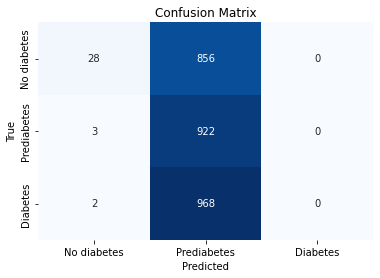

In [52]:
custom_labels = ['No diabetes', 'Prediabetes', 'Diabetes']
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=custom_labels, yticklabels=custom_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Feature ranking

In [53]:
weights = ann.layers[0].get_weights()[0]  # Assuming the first layer is the input layer
feature_importance = np.abs(weights).mean(axis=0)

In [54]:
print(feature_importance)

[ 9.596754    9.438613    9.404602    0.17819141  6.395672    7.1696305
  0.20622826  6.828397    0.20119585  9.530844    7.1642847   9.434302
  7.061831    9.46121     9.177884    7.039409    0.14880893  9.200754
  9.446773    9.437159    0.23445377 11.432978  ]


In [55]:
feature_names = X_train.columns
feature_importance_dict = dict(zip(feature_names, feature_importance))
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")

HighBP: 9.59675407409668
HighChol: 9.438612937927246
CholCheck: 9.40460205078125
BMI: 0.1781914085149765
Smoker: 6.395671844482422
Stroke: 7.169630527496338
HeartDiseaseorAttack: 0.20622825622558594
PhysActivity: 6.828396797180176
Fruits: 0.2011958509683609
Veggies: 9.530843734741211
HvyAlcoholConsump: 7.164284706115723
AnyHealthcare: 9.43430233001709
NoDocbcCost: 7.061830997467041
GenHlth: 9.461210250854492
MentHlth: 9.177884101867676
PhysHlth: 7.039409160614014
DiffWalk: 0.14880892634391785
Sex: 9.200754165649414
Age: 9.446772575378418
Education: 9.437158584594727
Income: 0.23445376753807068


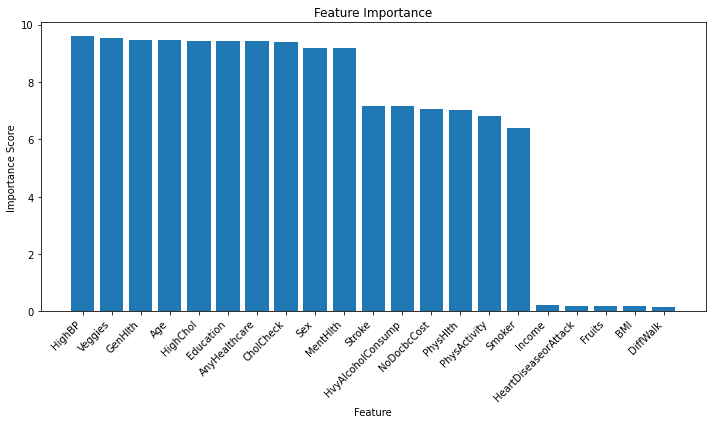

In [56]:
import matplotlib.pyplot as plt

# Assuming you have already computed the feature_importance_dict

# Convert the dictionary to a DataFrame for easier plotting
feature_importance_df = pd.DataFrame(list(feature_importance_dict.items()), columns=['Feature', 'Importance'])

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()